<a href="https://colab.research.google.com/github/anjitakandel/data-analysis/blob/main/Ecommerce_Churn_analysis_and_Prediction(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps
list(colormaps)


['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

In [32]:
df = pd.read_excel("/content/E Commerce Dataset.xlsx", sheet_name="E Comm")
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [33]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [34]:
df.drop(columns=['CustomerID'], inplace = True)
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [35]:
df.shape

(5630, 19)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [37]:
# Check the missing values
df.isnull().sum()


Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [38]:
# check total mising values
total_na = df.isnull().sum().sum()
print(f"Total missing values: {total_na} ({ round((total_na/df.shape[0])*100, 2) }%)")

Total missing values: 1856 (32.97%)


In [39]:
# fiiling missing values with median since makes more sense for vairables like Complain, CouponUsed, OrderCount

for col in df.columns:
  if df[col].isnull().sum()>0:
    df[col].fillna(df[col].median(), inplace=True)
# check missing values again

df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# Data Explration and Visualization


The percentage of customer churn

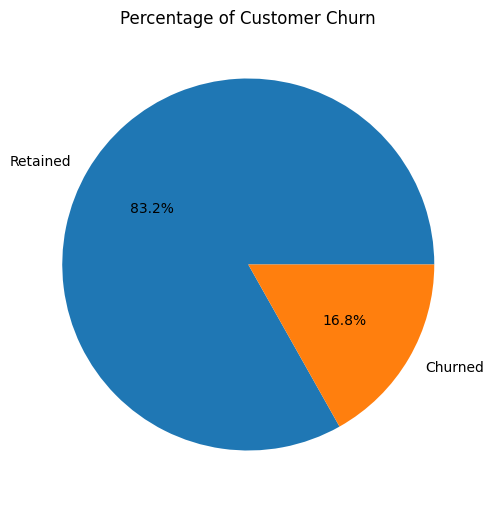

In [40]:
labels = ['Retained', 'Churned']
counts = df['Churn'].value_counts()
plt.figure(figsize=(6,10))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Percentage of Customer Churn")
plt.show()

### Churn based on Gender

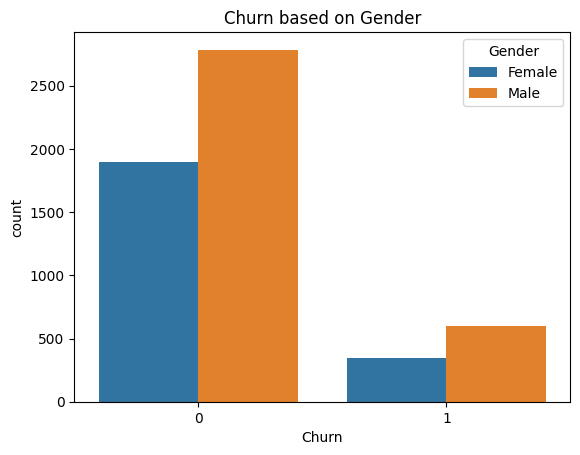

In [41]:
# Which gender is most likely to churn

sns.countplot(x=df['Churn'], hue=df['Gender'])
plt.title("Churn based on Gender")
plt.show()

### Distribution of Order count of customers

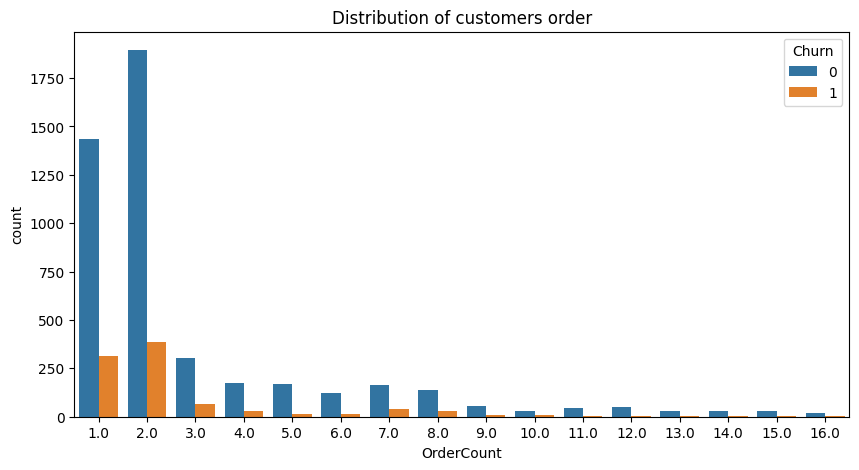

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['OrderCount'], hue=df['Churn'])
plt.title('Distribution of customers order')
plt.show()

### Customer Preferred Login Device

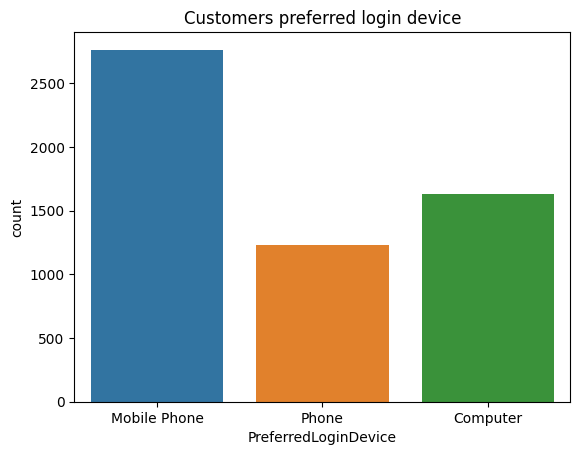

In [43]:
sns.countplot(x=df['PreferredLoginDevice'])
plt.title("Customers preferred login device")
plt.show()

### Customer Preferred Payment

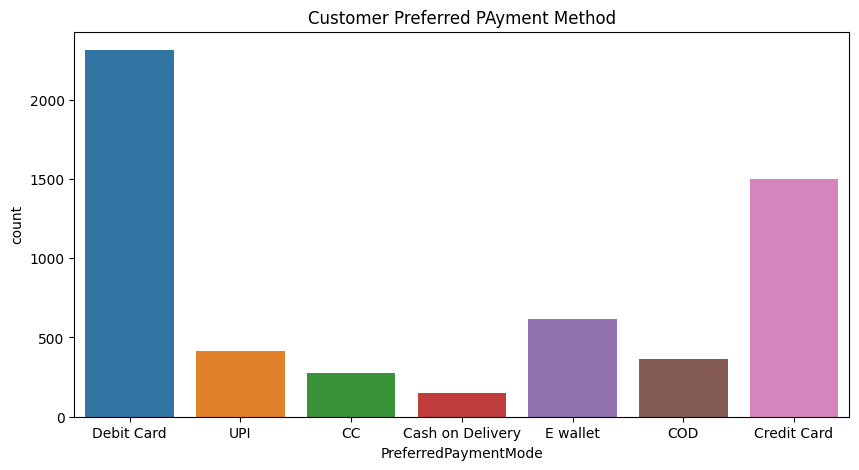

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['PreferredPaymentMode'])
plt.title("Customer Preferred PAyment Method")
plt.show()

### Preferred Order Category


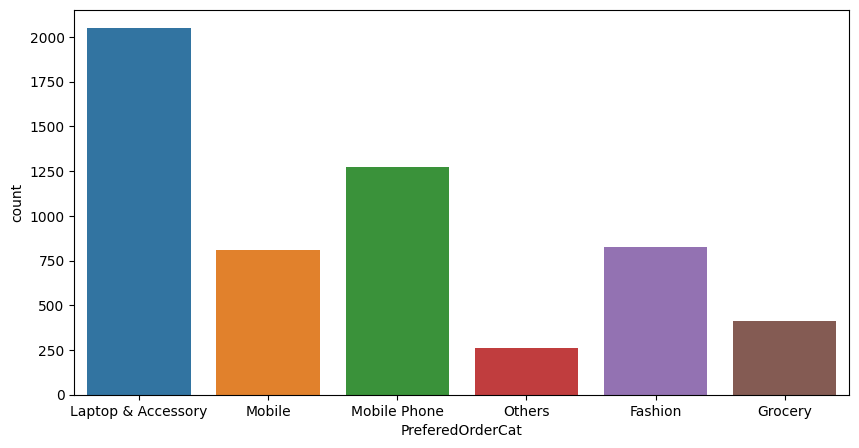

<Figure size 640x480 with 0 Axes>

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['PreferedOrderCat'])
plt.figure("Cstomer Preferrd Ordered Category")
plt.show()

### Customer distance from Warehouse

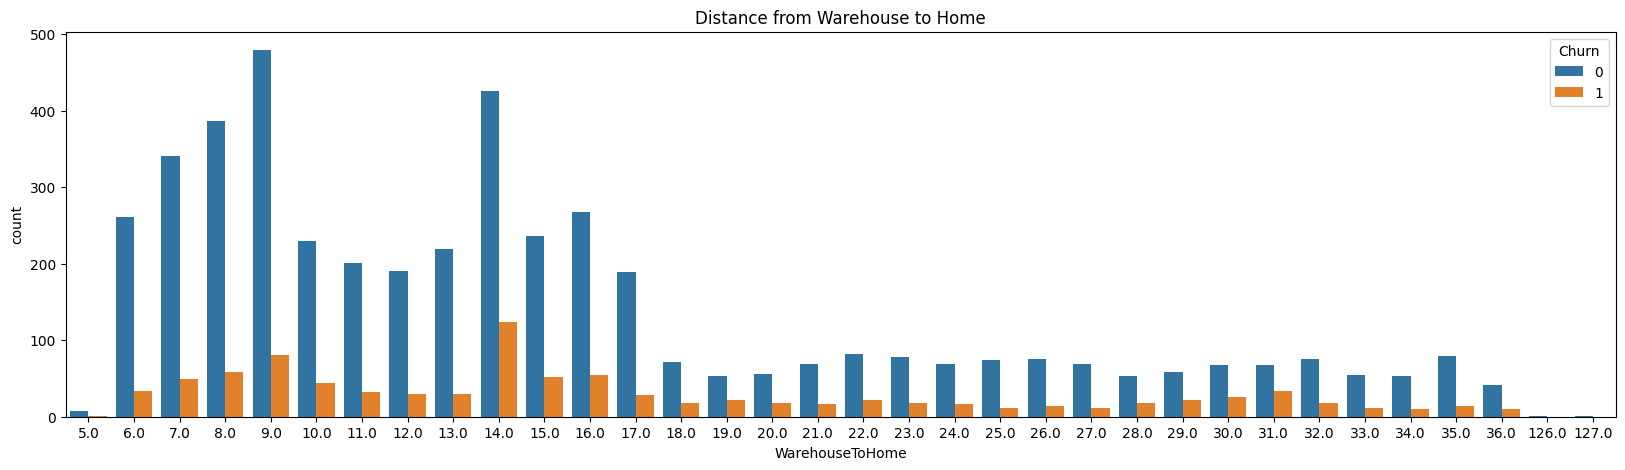

In [46]:
plt.figure(figsize=(20,5))
sns.countplot(x=df['WarehouseToHome'], hue=df['Churn'])
plt.title("Distance from Warehouse to Home")
plt.show()

### Customer City Tier

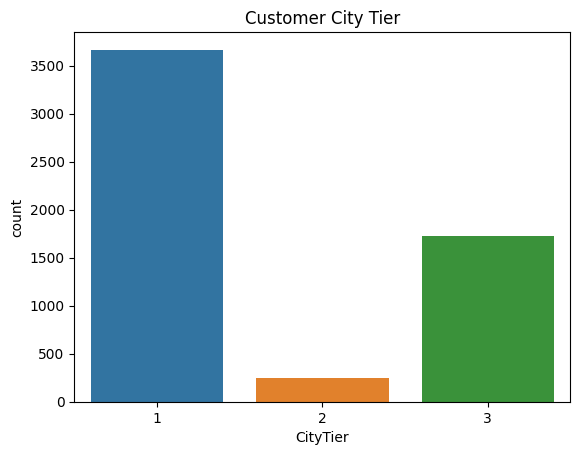

In [47]:
sns.countplot(x=df['CityTier'])
plt.title("Customer City Tier")
plt.show()

### Customer Hour Spend on App

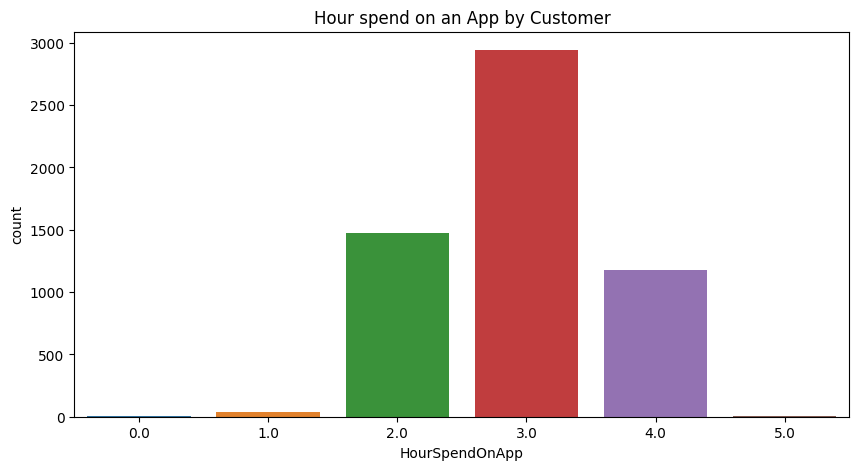

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['HourSpendOnApp'])
plt.title("Hour spend on an App by Customer")
plt.show()

### Satisfaction Score of a Customer

Average satisfaction score 3.066785079928952


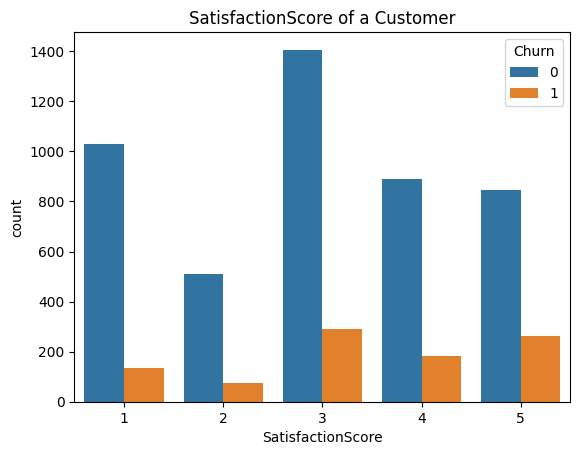

In [49]:
average_satisfaction_score = df['SatisfactionScore'].mean()
print(f"Average satisfaction score {average_satisfaction_score }")

# plt.figure(figsize=(5,5))
sns.countplot(x=df['SatisfactionScore'], hue=df['Churn'])
plt.title("SatisfactionScore of a Customer")
plt.show()

### Customer Marital Status

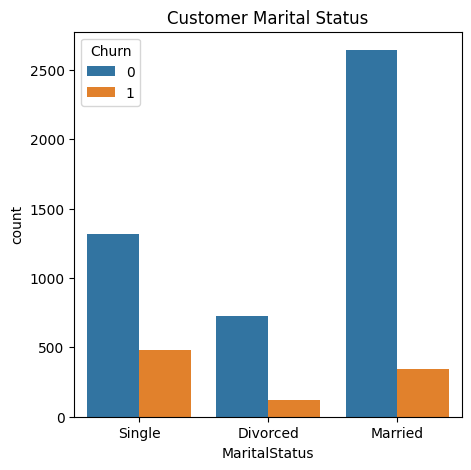

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['MaritalStatus'], hue=df['Churn'])
plt.title("Customer Marital Status")
plt.show()

### Customer Complains

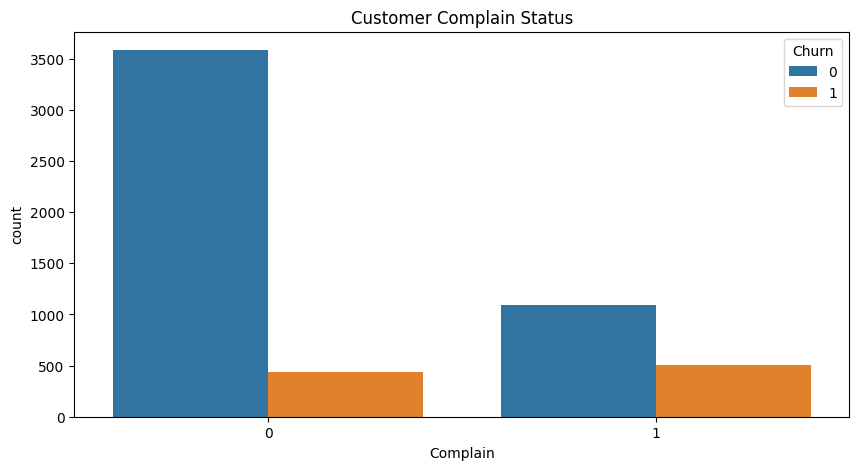

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Complain'], hue=df['Churn'])
plt.title("Customer Complain Status")
plt.show()

### Coupon used by Customers

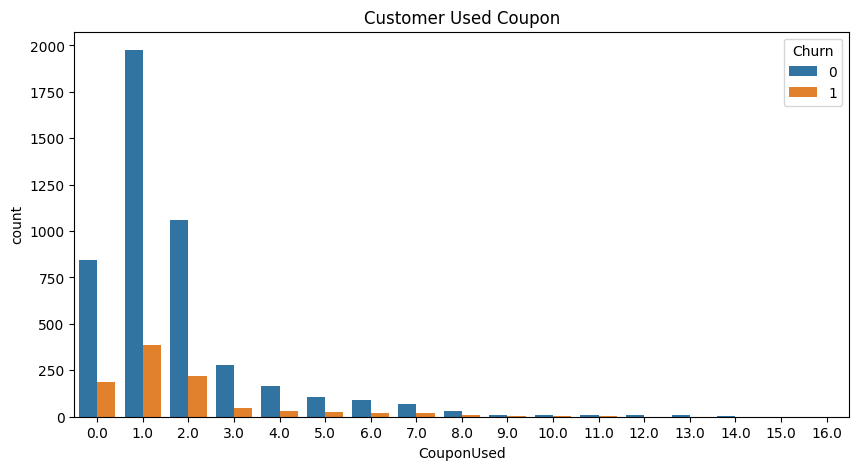

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['CouponUsed'], hue=df['Churn'])
plt.title('Customer Used Coupon')
plt.show()

### Customer Day Since Last Order

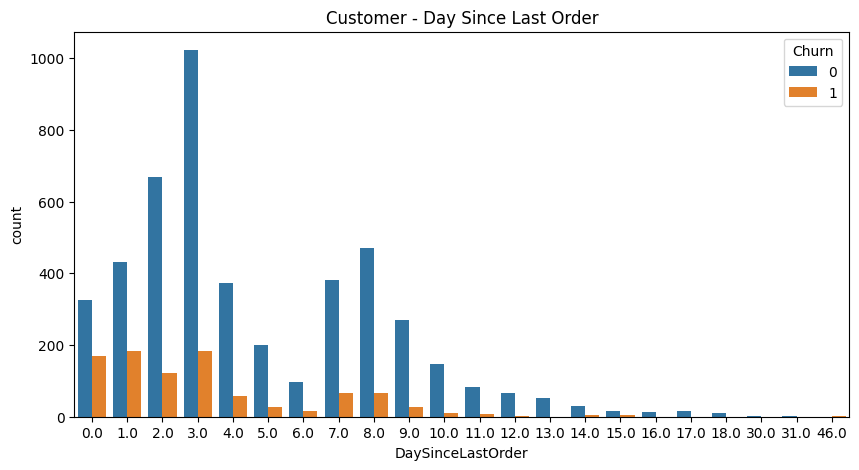

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['DaySinceLastOrder'], hue=df['Churn'])
plt.title('Customer - Day Since Last Order')
plt.show()

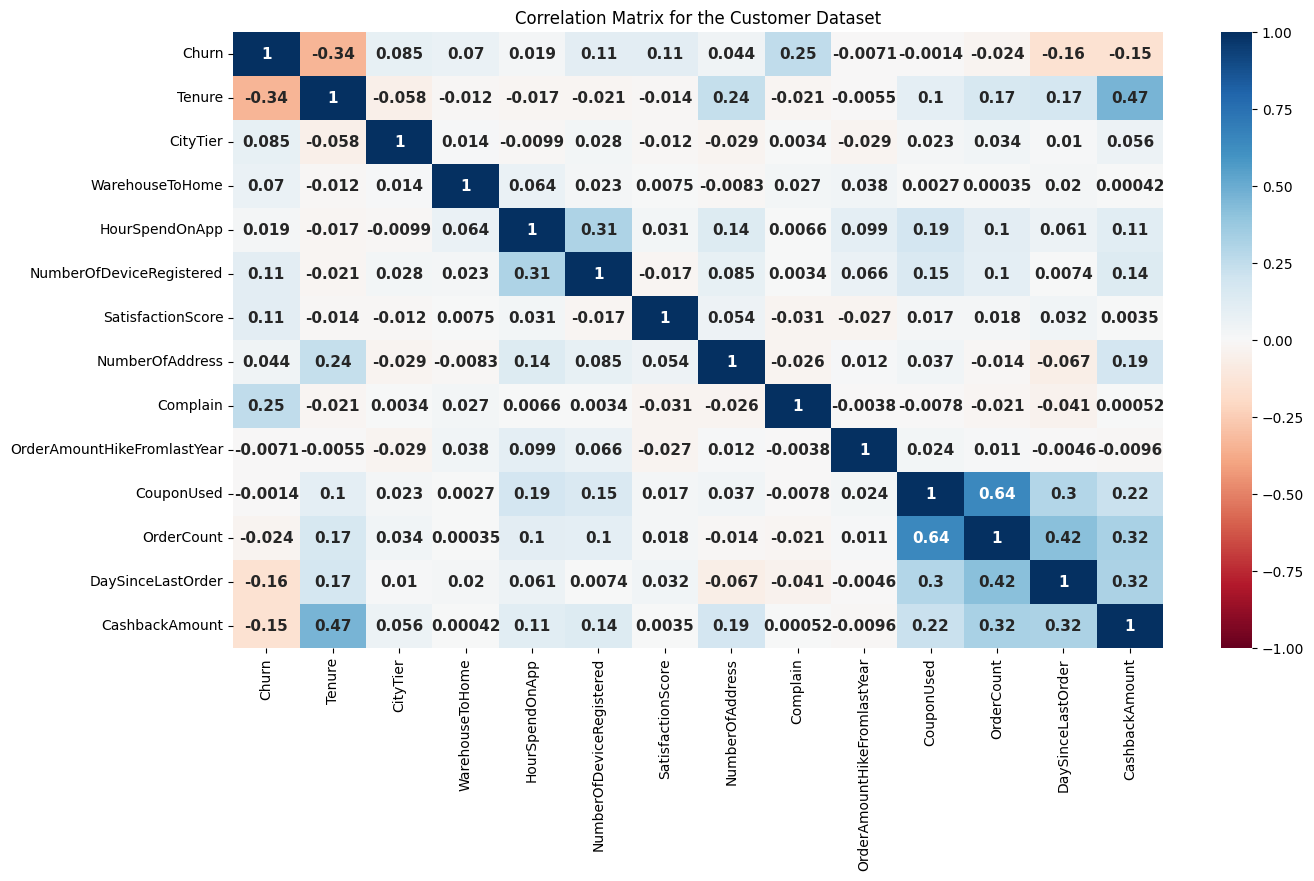

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), cmap='RdBu', vmin=-1, vmax=1, annot=True,
            annot_kws={'fontsize':11, 'fontweight': 'bold'})
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

### So, from the analysis

<li>There are 4.682 users (82.2%) retained, while 948 users (16.8%) has churned.</li>
<li>Customers spend 2-4 hours in the app.</li>
<li>Customers mostly only order 1-2 times.</li>
<li>Warehouse to home distance doesn't affect customer churn.</li>
<li>Customers who complain and also with single status have higher churn rate</li>
<li>From correlation matrix, correlation between and Churn is 0.07 (0.069544 to be more precise). This means weak or no correlation.</li>






## Data Preprocessing

In [55]:
from sklearn.preprocessing import LabelEncoder
# Create function to convert column with dtype object to integer
def object_to_int(x):
  if x.dtype == 'object':
    x = LabelEncoder().fit_transform(x)
  return x

In [56]:
# convert column dtype object to int
df = df.apply(lambda x : object_to_int(x))

In [57]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,2,1,12.0,0,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60


In [58]:
df.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice             int64
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode             int64
Gender                           int64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                 int64
SatisfactionScore                int64
MaritalStatus                    int64
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [59]:
# check
df['Gender'].unique()

array([0, 1])

# Note:

Oversampling is done to address class imbalance in a dataset, especially in the context of binary classification problems. Class imbalance occurs when the distribution of classes (categories) in the target variable is not approximately equal. In other words, one class significantly outnumbers the other.

For example, consider a binary classification problem where you are predicting whether a customer will churn (1) or not (0). If 90% of the examples belong to the non-churn class (class 0) and only 10% belong to the churn class (class 1), the dataset is imbalanced. In such cases, a machine learning model may become biased towards the majority class, leading to poor predictive performance for the minority class.

Oversampling involves increasing the number of instances in the minority class to balance the class distribution. This can be done by duplicating existing instances (simple oversampling) or generating synthetic examples using techniques like SMOTE (Synthetic Minority Over-sampling Technique). By providing the algorithm with more examples of the minority class, it helps the model to learn better and make more accurate predictions for the minority class.

## Key reasons for oversampling include:
<li><b>Improving Mdel Performances:</b><br>
Class imbalance can lead to models that are biased towards the majority class, resulting in poor performance on the minority class. Oversampling helps the model to learn the patterns in the minority class more effectively.</li>

<li><b>Preventing Biased Predictions:</b><br>
In imbalanced datasets, models may be more likely to predict the majority class since it minimizes the overall error. Oversampling ensures that the model is not biased towards the majority class, and it is more capable of making accurate predictions for both classes.</li>

<li><b>Enhancing Model Generalization:</b><br>
Oversampling can lead to a more generalized model that performs well on unseen data. Without balancing the classes, a model might memorize the majority class and perform poorly on new instances of the minority class.</li>

In [61]:
# balance dfset with oversampling
from sklearn.utils import resample
df_0 = df.loc[df['Churn'] == 0]
df_1 = df.loc[df['Churn'] == 1]

# Count total each churn feature
n_0 = len(df_0)
n_1 = len(df_1)

# Applying oversampling method
df_oversampling = resample(df_1, replace=True, n_samples=n_0, random_state=42)
df_new = pd.concat([df_oversampling, df_0])
df_new = df_new.sample(frac=1)
df_new.reset_index(drop=True, inplace=True)


In [62]:
# Check total churn data after applying oversampling method
df_new['Churn'].value_counts()

1    4682
0    4682
Name: Churn, dtype: int64

## Machine Learning Model
In this section, we will be using three machine learning model; Logistic Regression, SVC, and KNN to predict the accuracy of customer churn and compare each model to see which one does the best prediction.


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X = df_new.drop(['Churn'], axis=1)
y = df_new['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression(solver = 'lbfgs', max_iter=100)
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)
accuracy = accuracy_score(y_test, logreg_prediction)
classification = classification_report(y_test, logreg_prediction)
print(f"Accracy Score: {accuracy}")
print(f"Classification Report:{classification}")

Accracy Score: 0.7857651245551601
Classification Report:              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1391
           1       0.77      0.82      0.79      1419

    accuracy                           0.79      2810
   macro avg       0.79      0.79      0.79      2810
weighted avg       0.79      0.79      0.79      2810



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest Neighbor(KNN)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_prediction = logreg.predict(X_test)
accuracy = accuracy_score(y_test, knn_prediction)
classification = classification_report(y_test, logreg_prediction)
print(f"Accuracy score:{accuracy}")
print(f"Classification Report:{classification}")


Accuracy score:0.7857651245551601
Classification Report:              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1391
           1       0.77      0.82      0.79      1419

    accuracy                           0.79      2810
   macro avg       0.79      0.79      0.79      2810
weighted avg       0.79      0.79      0.79      2810



Support Vector Machine(SVM)


In [70]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
accuracy = accuracy_score(y_test, svc_prediction)
print(f"Accuracy Score: {accuracy}")
classification = classification_report(y_test, svc_prediction)
print(f"Classification Report: {classification}")


Accuracy Score: 0.7537366548042704
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.66      0.73      1391
           1       0.72      0.84      0.78      1419

    accuracy                           0.75      2810
   macro avg       0.76      0.75      0.75      2810
weighted avg       0.76      0.75      0.75      2810



## Conclusion:
### So, after training three Machine Learning Model
**Here is the conclusion:**

<ol>Logistic Regression:
<li>Accuracy Score: 0.79</li>
<li>Customer Churn Precision: 0.80</li>
<li>Customer Churn Recall: 0.80</li>
</ol>
<ol>K-Nearest Neighbor (KNN):
<li>Accuracy Score: 0.79</li>
<li>Customer Churn Precision: 0.80</li>
<li>Customer Churn Recall: 0.80</li></ol>
<ol>Support Vector Machine (SVM):
<li>Accuracy Score: 0.76</li>
<li>Customer Churn Precision: 0.75</li>
<li>Customer Churn Recall: 0.82</li></ol>
